In [109]:
from matplotlib.dates import DateFormatter
from pathlib import Path
import datetime
import json
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import textwrap

plt.rcParams['figure.figsize'] = (20, 9)
plt.rcParams['font.sans-serif']=['Segoe UI Emoji']

In [111]:
RUN_HEAVY = True

# Loading a single person's conversation

This hard codes the conversation, you can get the link by right clicking on the file you want and then chosing _Copy Relative Path_ and then pasting it in below.

In [131]:
def parse_obj(obj):
    for key in obj:
        if isinstance(obj[key], str):
            obj[key] = obj[key].encode("latin_1").decode("utf-8")
        elif isinstance(obj[key], list):
            obj[key] = list(
                map(
                    lambda x: x
                    if type(x) != str
                    else x.encode("latin_1").decode("utf-8"),
                    obj[key],
                )
            )
        pass
    return obj


rootdir = "fb_data/messages/inbox/megansu_zepkvzqqpg"

message_list = []
participants = []
for p in os.listdir(rootdir):
    path = os.path.join(rootdir, p)
    if Path(path).is_file():
        with open(path, "r") as insta_data:
            messages = json.load(insta_data, object_hook=parse_obj)
            participants = messages["participants"]
            message_list.extend(messages["messages"])


In [158]:
# message_list = messages["messages"]
df = pd.DataFrame(message_list)
df["datetime"] = df.timestamp_ms.apply(
    lambda x: datetime.datetime.fromtimestamp(x / 1000.0)
)


def get_message_length(message):
    if type(message) is str:
        return len(message)
    else:
        return len(str(message))


def replace_typographic_apostrophy(message):
    if type(message) is str:
        return message.replace("’", "'")
    else:
        return message


df["message_length"] = df.content.apply(get_message_length)
df.content = df.content.apply(replace_typographic_apostrophy)

print(df.shape)
df.sample(5)


(15809, 16)


sender_name   timestamp_ms                           content     type  \
14972         장수영  1559220979979                               NaN  Generic   
1869     Megan Su  1523941791467              u wanna do the poop?  Generic   
1687     Megan Su  1526816317592     Oh did they see the cat stuff  Generic   
4583     Megan Su  1460778012725                                mm  Generic   
15697         장수영  1555160871753  But im already getting home sick  Generic   

       is_unsent                                             photos share  \
14972      False  [{'uri': 'messages/inbox/megansu_zepkvzqqpg/ph...   NaN   
1869       False                                                NaN   NaN   
1687       False                                                NaN   NaN   
4583       False                                                NaN   NaN   
15697      False                                                NaN   NaN   

                                      reactions videos  call_duration missed  \
14972                                       NaN    NaN            NaN    NaN   
1869                                        NaN    NaN            NaN    NaN   
1687                                        NaN    NaN            NaN    NaN   
4583                                        NaN    NaN            NaN    NaN   
15697  [{'reaction': '😢', 'actor': 'Megan Su'}]    NaN            NaN    NaN   

      sticker   ip audio_files                datetime  message_length  
14972     NaN  NaN         NaN 2019-05-30 22:56:19.979               3  
1869      NaN  NaN         NaN 2018-04-17 15:09:51.467              20  
1687      NaN  NaN         NaN 2018-05-20 21:38:37.592              29  
4583      NaN  NaN         NaN 2016-04-16 13:40:12.725               2  
15697     NaN  NaN         NaN 2019-04-13 23:07:51.753              32

In [137]:
#def get_sticker_path(sticker_dict):
   # try:
      #  return sticker_dict["uri"]
  #  except:
       # return sticker_dict
#df["sticker_path"] = df.sticker.apply(get_sticker_path)
#  df[df.sticker != np.nan].sticker.value_counts()
#sticker_use = df.sticker_path.value_counts()

In [140]:
#sticker_use[sticker_use>4]

![](fb_data/messages/stickers_used/51173232_2041461982641170_3969840827198341120_n_597731453680904.png)     34
![](fb_dta/messages/stickers_used/10540963_823256757693302_1360304516_n_823256754359969.png           )    19
![](messages/stickers_used/10734290_336049743265329_2009160528_n_336049736598663.png            )   16
![](messages/stickers_used/70167666_2962427933829617_4712374732043845632_n_748882735184159.png  )   12
messages/stickers_used/39178562_1505197616293642_5411344281094848512_n_369239263222822.png    ) 11
messages/stickers_used/851571_488524164594362_432961342_n_488524161261029.png                  11
messages/stickers_used/10734338_1601168526781732_456732747_n_1601168520115066.png               9
messages/stickers_used/64320324_2106763839620686_1237871993466912768_n_1402232960073781.png     9
messages/stickers_used/70053275_2370694373185100_3100093813566210048_n_1464926033761943.png     7
messages/stickers_used/10734296_1601587513406500_142359481_n_1601587506739834.png               7
messages/stickers_used/61894224_2335492683400740_8700533251162243072_n_1762414044041943.png     7
messages/stickers_used/851581_488524084594370_701228496_n_488524081261037.png                   7
messages/stickers_used/10734316_1601168373448414_1912830049_n_1601168366781748.png              7
messages/stickers_used/64402654_2106833029613767_1245155252978581504_n_1402232926740451.png     6
messages/stickers_used/851582_488524141261031_1929515712_n_488524137927698.png                  6
messages/stickers_used/68097547_410157852935201_1407781956258627584_n_184023735548615.png       6
messages/stickers_used/10574700_1601168803448371_1182509898_n_1601168796781705.png              5
messages/stickers_used/851582_369239386556143_1497813874_n_369239383222810.png                  5

In [143]:
unsent = [m for m in message_list if m["is_unsent"]]
period_string = f"{df.datetime.min():%A %d %B, %Y} and {df.datetime.max():%A %d %B, %Y}"
print (
    f"Conversation between {participants[0]['name']} and {participants[1]['name']}.\n"
    f"Covering the period between {period_string}.\n"
    f"In this period there were {len(message_list)} messages, "
    f"{len([x for x in df.photos if x is not np.nan])} photos, "
    f"{len([x for x in df.videos if x is not np.nan])} videos, "
    # f"{len([x for x in df.audio_files if x is not np.nan])} audio files, "
    f"{len(unsent)} messages were unsent"
)


Conversation between Megan Su and 장수영.
Covering the period between Sunday 26 July, 2015 and Tuesday 22 June, 2021.
In this period there were 15809 messages, 496 photos, 11 videos, 7 messages were unsent


Text(0.5, 1.0, 'Total number of messages sent between Sunday 26 July, 2015 and Tuesday 22 June, 2021')

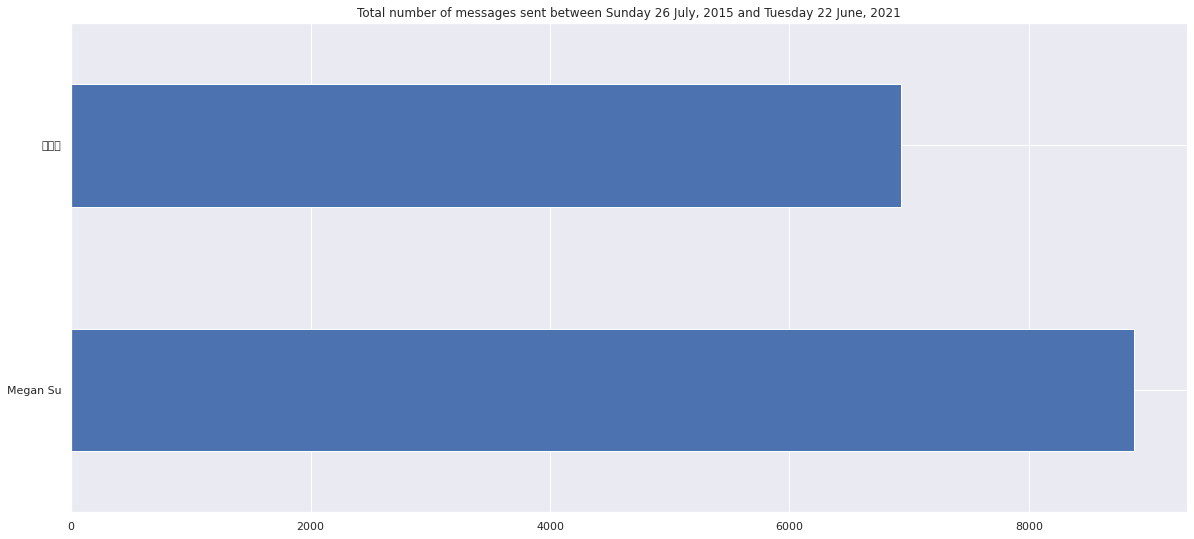

In [146]:
df.sender_name.value_counts().plot.barh()
plt.title(
    f"Total number of messages sent between {period_string}"
)


Text(0.5, 1.0, 'Types of message sent between Sunday 26 July, 2015 and Tuesday 22 June, 2021')

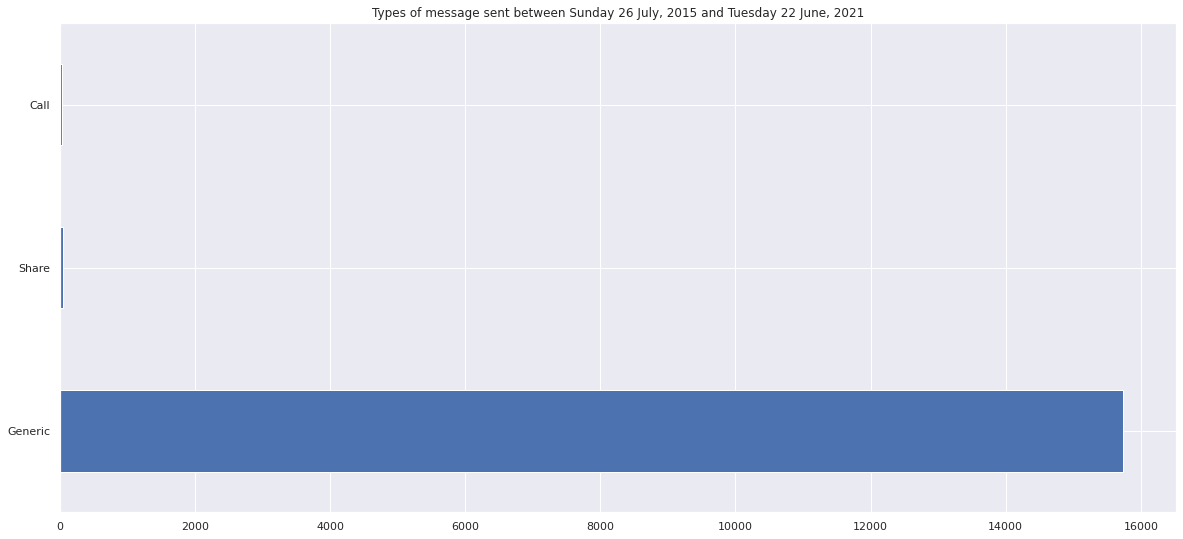

In [149]:
df["type"].value_counts().plot.barh()
plt.title(f"Types of message sent between {period_string}")


/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sooyoungjang/opt/anaconda3/lib/p

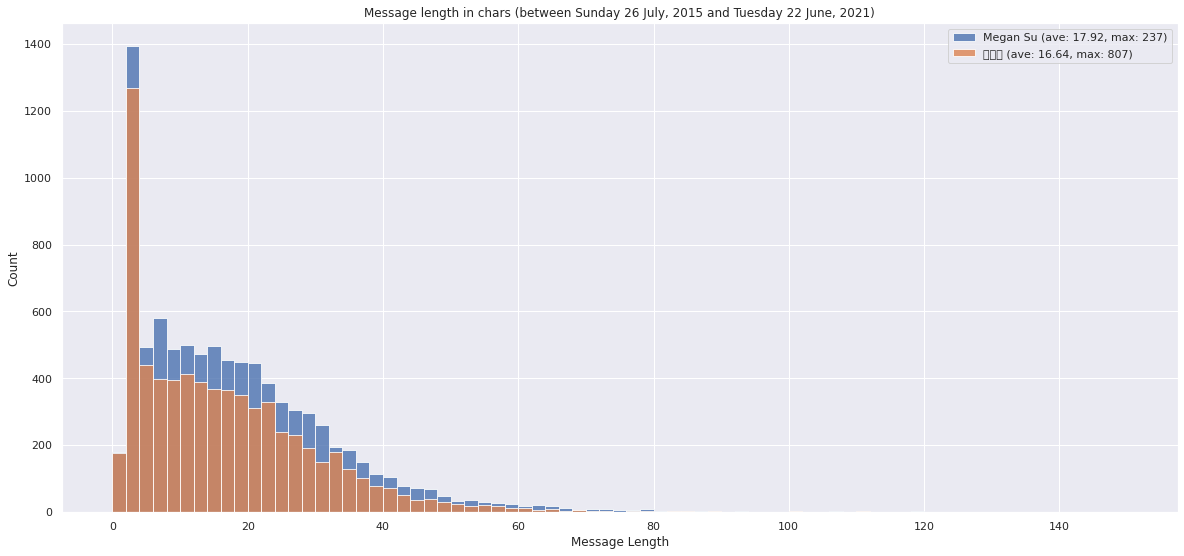

In [152]:
if RUN_HEAVY:
    plt.title(f"Message length in chars (between {period_string})")
    for name, data in df.groupby("sender_name"):
        ave_length = data.message_length.mean()
        max_length = data.message_length.max()
        plt.hist(
            data.message_length,
            bins=75,
            range=[0, 150],
            label=f"{name} (ave: {ave_length:.2f}, max: {max_length})",
            alpha=0.8,
        )
        plt.xlabel("Message Length")
        plt.ylabel("Count")
        plt.legend()


/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sooyoungjang/opt/anaconda3/lib/p

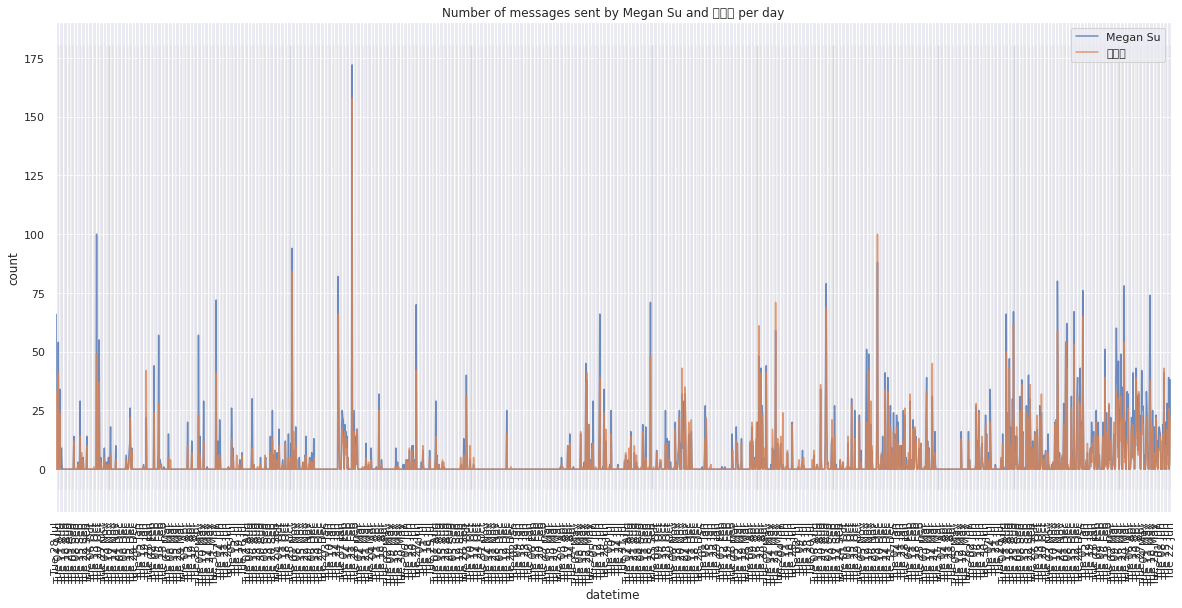

In [155]:
def messages_per_day(range=False):
    sender_a = participants[0]["name"]
    a_message_counts = (
        df[df.sender_name == sender_a]
        .set_index("datetime")
        .groupby(pd.Grouper(freq="D"))
        .count()
    )
    ax = a_message_counts.sender_name.plot(alpha=0.8, label=sender_a)
    sender_b = participants[1]["name"]
    b_message_counts = (
        df[df.sender_name == sender_b]
        .set_index("datetime")
        .groupby(pd.Grouper(freq="D"))
        .count()
    )
    b_message_counts.sender_name.plot(alpha=0.8, label=sender_b)
    plt.title(f"Number of messages sent by {sender_a} and {sender_b} per day")
    plt.ylabel("count")
    plt.legend()
    plt.grid(True)

    # Highlight the weekends
    # https://stackoverflow.com/a/66064136/1835727
    xmin, xmax = ax.get_xlim()
    days = np.arange(np.floor(xmin), np.ceil(xmax) + 2)  # range of days in date units
    weekends = [(dt.weekday() >= 5) | (dt.weekday() == 0) for dt in mdates.num2date(days)]
    ax.fill_between(days, *ax.get_ylim(), where=weekends, facecolor="k", alpha=0.1)
    if range:
        ax.set_xlim(range[0], range[1])  # set limits back to default values
    else:
        ax.set_xlim(xmin, xmax)  # set limits back to default values

    date_form = DateFormatter("%a %d %b")
    ax.xaxis.set_major_formatter(date_form)
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    plt.xticks(rotation=90)
    plt.show()

if RUN_HEAVY:
    messages_per_day()

/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sooyoungjang/opt/anaconda3/lib/p

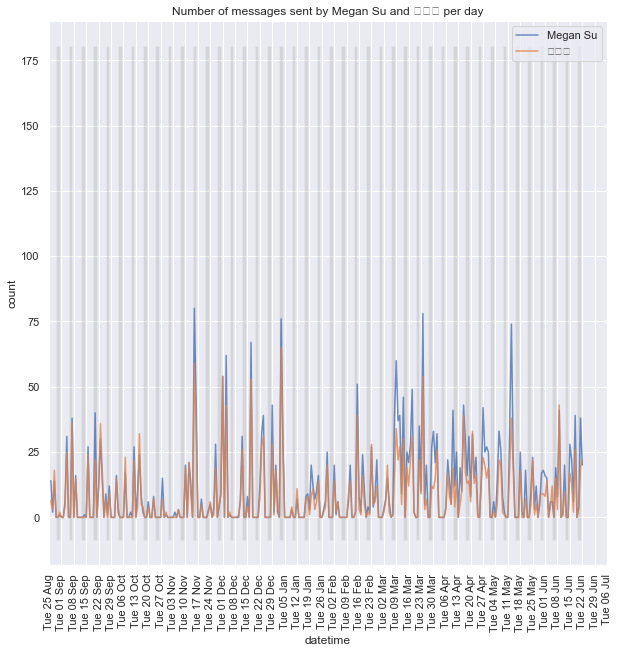

In [159]:
if RUN_HEAVY:
    messages_per_day(range=[18181+318, 18814] )

In [ ]:
if RUN_HEAVY:
    p_a = participants[0]["name"]
    p_b = participants[1]["name"]
    day_counts = []
    for x, data in df.set_index("datetime").groupby(pd.Grouper(freq="D")):
        vc = data.sender_name.value_counts()

        dic = {"datetime": x, p_a: vc.get(p_a, 0), p_b: vc.get(p_b, 0)}
        day_counts.append(dic)
        # print(x,vc, dic)

    dc_df = pd.DataFrame(day_counts)
    dc_df.set_index("datetime", inplace=True)


    def make_ratio(row):
        try:
            a = row.get(p_a, 0)
            b = row.get(p_b, 0)
            if a > 0 and b > 0:
                r = a / b
            else:
                r = 0
            return r
        except:
            return 0


    dc_df["ratio"] = dc_df.apply(make_ratio, axis=1)
    dc_df.drop(["ratio"], axis=1).plot()


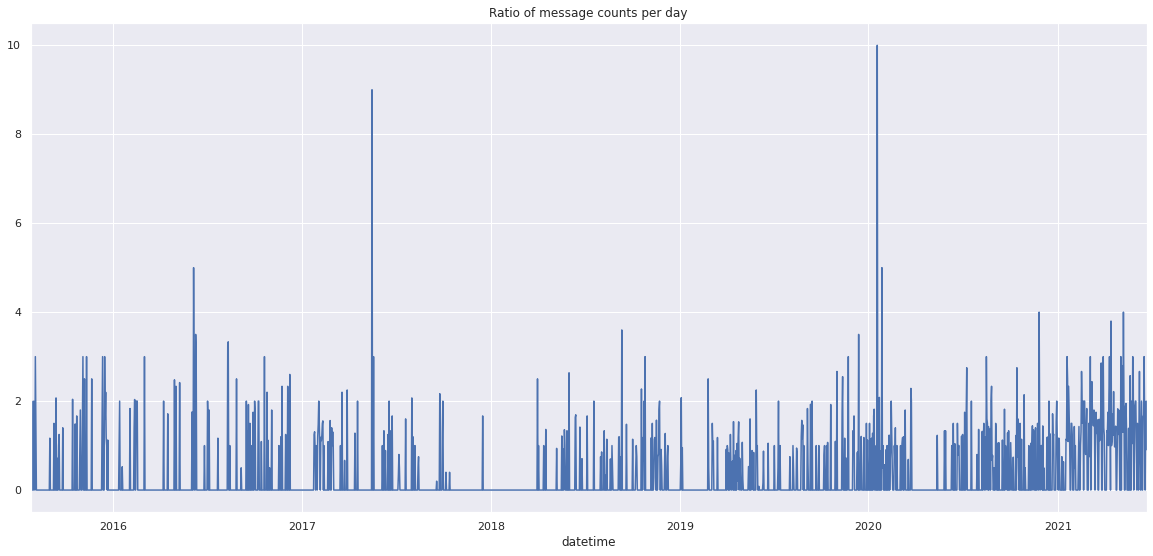

In [138]:
if RUN_HEAVY:
    dc_df.ratio.plot()
    plt.title("Ratio of message counts per day");

In [141]:
s = df.loc[df["datetime"].between("2021-06-01", "2021-06-5", inclusive=False)]
s[["sender_name", "content"]]


sender_name                               content
6247         장수영                Nop we went to newtown
6248    Megan Su             U didnt get snowy cheese?
6249    Megan Su                                 I see
6250    Megan Su                                     O
6251         장수영                                 Pasta
...          ...                                   ...
6305    Megan Su                              Bought 4
6306    Megan Su  I spent $80 on the onmyoji figurines
6307         장수영                                  What
6308    Megan Su            I just did a baddddd thing
6309    Megan Su                           Sooyoungggg

[63 rows x 2 columns]

/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0, flags=flags)


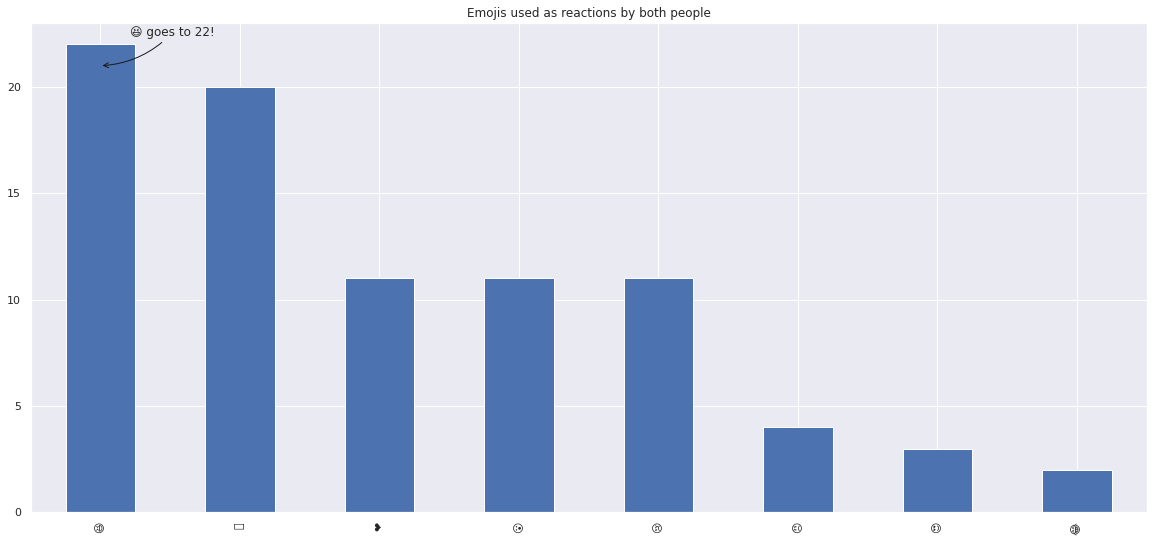

In [144]:
def get_reaction_emojis(reaction):
    if type(reaction) is list:
        emojis = [r["reaction"] for r in reaction]
        return "".join(emojis)
    else:
        return reaction


df["reaction_emojis"] = df.reactions.apply(get_reaction_emojis)

if RUN_HEAVY:
    vc = df.reaction_emojis.value_counts()
    plt.title(f"Emojis used as reactions by both people")
    ax = vc[vc > 1].plot.bar()
    ax.set_ylim(0, vc[1]*1.15)
    plt.annotate(
        f"{vc.index[0]} goes to {vc[0]}!",
        (0, vc[1]*1.05),
        xycoords="data",
        xytext=(30, 30),
        textcoords="offset points",
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2", color="k"),
    )


Emojis used, in descending order of frequency:  ❤,😂,😢,👍,😮,😠


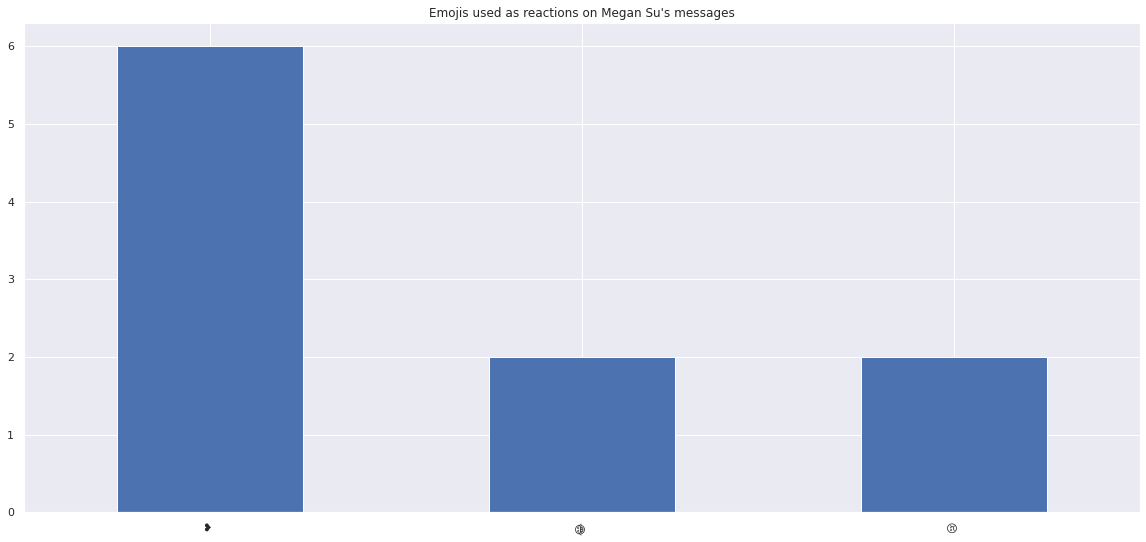

Emojis used, in descending order of frequency:  😆,👍,😮,😢,❤,😍,😠,👎,😫
/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_

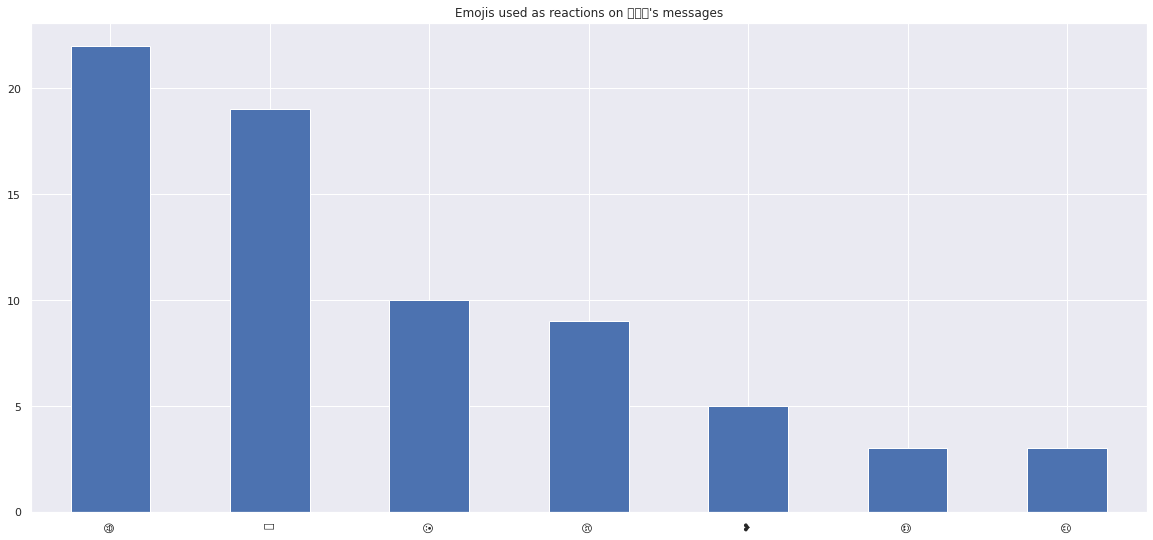

In [147]:
if RUN_HEAVY:
    for name, data in df.groupby("sender_name"):
        plt.title(f"Emojis used as reactions on {name}'s messages")
        all_response_emojis = [
            x for x in list(data.reaction_emojis.unique()) if x is not np.nan
        ]
        vc = data.reaction_emojis.value_counts()
        ae = ",".join(vc.index.to_list())
        print("Emojis used, in descending order of frequency: ",ae)
        vc[vc > 1].plot.bar()
        props = dict(boxstyle="round", facecolor="wheat", alpha=0.5)
        plt.show()


In [150]:
def sumarise_convo(name, data):
    stop_words = [
        "that's", "i", "i'm", "i'd", "i'll", "it's", "i've", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", 
        "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", 
        "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", 
        "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", 
        "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", 
        "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", 
        "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", 
        "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", 
        "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", 
        "s", "t", "can", "will", "just", "don", "should", "now", "u"
    ]  # From: https://gist.github.com/sebleier/554280
    words = {}
    words[name] = data.content.str.cat(sep=" ")
    wordcount = len(words[name].split(" "))

    clean_words = [
        x.lower() for x in words[name].split(" ") if x.lower() not in stop_words
    ]
    unique_words = set(words[name].split(" "))
    print(
        f"Between {period_string}, {name} wrote {wordcount} words ({len(words[name])} characters)"
        f" and used {len(unique_words)} different words."
    )
    # print(unique_words)

    word_freq = pd.Series(clean_words).value_counts()
    top = 40
    # print(word_freq.iloc[:top])
    try:
        word_freq.iloc[:top].plot.barh()
        plt.title(f"{name}'s top {top} most used words")
        plt.tight_layout()
        plt.savefig(f"convo_graphs/{name}'s most used words")
        plt.show()
    except Exception as e:
        print(name, e)


Between Sunday 26 July, 2015 and Tuesday 22 June, 2021, Megan Su wrote 34855 words (165995 characters) and used 5158 different words.
Megan Su [Errno 2] No such file or directory: "convo_graphs/Megan Su's most used words.png"
Between Sunday 26 July, 2015 and Tuesday 22 June, 2021, 장수영 wrote 25806 words (120063 characters) and used 4183 different words.
/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/

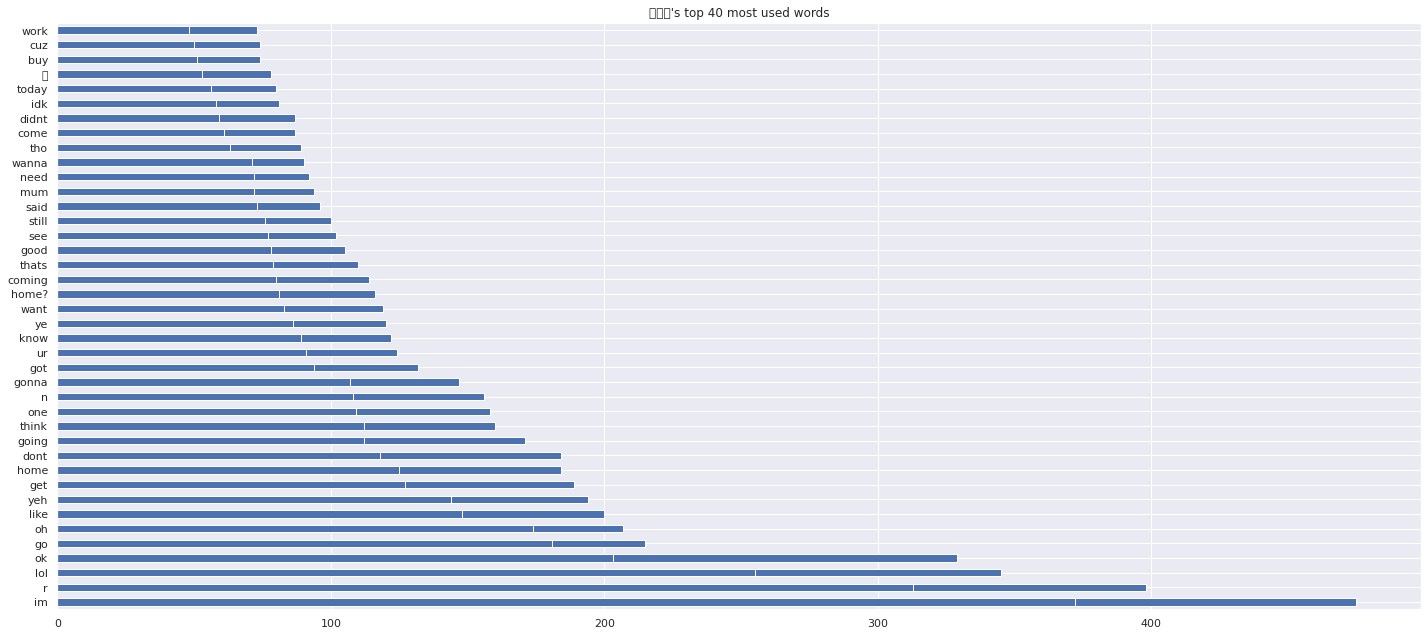

In [153]:
if RUN_HEAVY:
    for name, data in df.groupby("sender_name"):
        sumarise_convo(name, data)

In [156]:
def time_to_seconds(dt):
    t = dt.time()
    seconds = (t.hour * 60 + t.minute) * 60 + t.second
    return seconds


df["date"] = df.datetime.apply(lambda x: x.date())
df["time"] = df.datetime.apply(lambda x: x.time())
df["seconds"] = df.datetime.apply(time_to_seconds)
df.sample(5)


sender_name   timestamp_ms                         content     type  \
12449         장수영  1589343920099                            2 40  Generic   
7161     Megan Su  1619073290734  U want to eat dinner together?  Generic   
8286     Megan Su  1615794479379              And it's all stops  Generic   
2229          장수영  1498259526053                            Okay  Generic   
8129     Megan Su  1616043475372       Yh. Do you have umbrellas  Generic   

       is_unsent photos share reactions videos  call_duration missed sticker  \
12449      False    NaN   NaN       NaN    NaN            NaN    NaN     NaN   
7161       False    NaN   NaN       NaN    NaN            NaN    NaN     NaN   
8286       False    NaN   NaN       NaN    NaN            NaN    NaN     NaN   
2229       False    NaN   NaN       NaN    NaN            NaN    NaN     NaN   
8129       False    NaN   NaN       NaN    NaN            NaN    NaN     NaN   

        ip audio_files                datetime  message_length  \
12449  NaN         NaN 2020-05-13 14:25:20.099               4   
7161   NaN         NaN 2021-04-22 16:34:50.734              30   
8286   NaN         NaN 2021-03-15 18:47:59.379              18   
2229   NaN         NaN 2017-06-24 09:12:06.053               4   
8129   NaN         NaN 2021-03-18 15:57:55.372              25   

      reaction_emojis        date             time  seconds  
12449             NaN  2020-05-13  14:25:20.099000    51920  
7161              NaN  2021-04-22  16:34:50.734000    59690  
8286              NaN  2021-03-15  18:47:59.379000    67679  
2229              NaN  2017-06-24  09:12:06.053000    33126  
8129              NaN  2021-03-18  15:57:55.372000    57475

In [160]:
if RUN_HEAVY:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df.date, df.seconds, s=100, alpha=0.04)
    ax.yaxis_date()
    fig.autofmt_xdate()
    plt.title("Group chat from instagram")

    plt.show()


AttributeError: 'DataFrame' object has no attribute 'date'

So, this makes sense to me, but it's a bit gross. The y axis is all messed up, it should be showing time, not number of seconds. I'm also not sure if time goes forward up or down the page.

It'd be good to work out a way of identifying sleep periods. Maybe that's a period that starts after 10pm that's offline for more than 4 hours?

In [163]:
if RUN_HEAVY:
    plot = sns.lmplot(
        x="date",
        y="seconds",
        data=df,
        # data=all_convo_df,
        hue="sender_name",
        fit_reg=False,
        legend=True,
        palette="Set2",
        col="sender_name",
        col_wrap=4,
        scatter_kws=dict(s=80, alpha=0.2),
        height=7,
        aspect=10 / 7,
    )


KeyError: "['seconds', 'date'] not in index"

/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/sooyoungjang/opt/anaconda3/

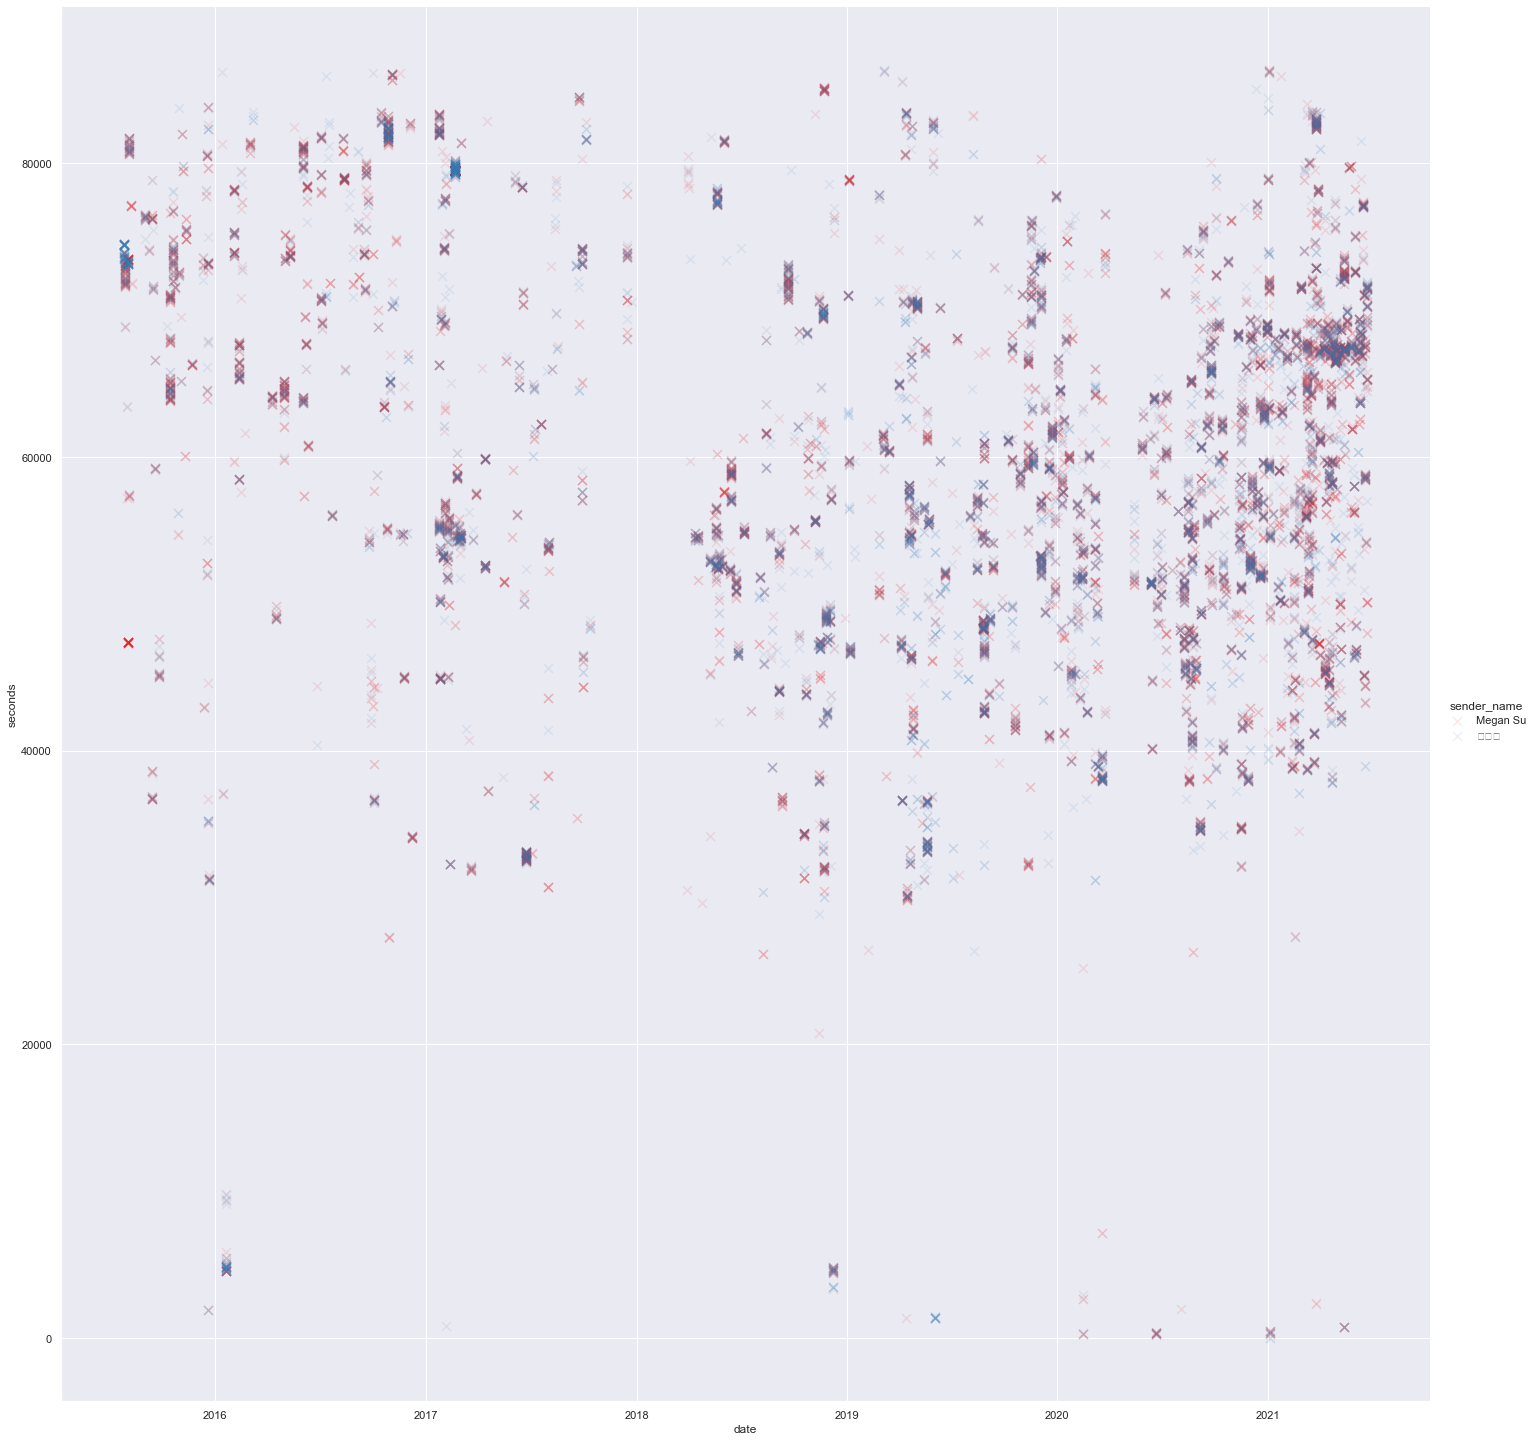

In [157]:
if RUN_HEAVY:
    sns.set(rc={"figure.figsize": (10, 10)})
    plot = sns.lmplot(
        x="date",
        y="seconds",
        data=df,
        hue="sender_name",
        markers=["x", "x"],
        fit_reg=False,
        legend=True,
        palette="Set1",
        scatter_kws=dict(s=80, alpha=0.1),
        height=20,
        aspect=20 / 20,
    )
    # plt.xticks(rotation=45);


In [164]:
try:
    df.set_index("datetime", inplace=True)
except:
    pass # already set
df["window_30min"] = df['sender_name'].rolling("30min").count()
if RUN_HEAVY:
    df.window_30min.plot()
    plt.title("Messages sent per 30 minute rolling window")

ValueError: index must be monotonic

In [165]:
if RUN_HEAVY:
    df["binary_convo_in_window"] = df.window_30min.apply(lambda x: 0 if x<2 else 1)
    df.binary_convo_in_window.plot()

AttributeError: 'DataFrame' object has no attribute 'window_30min'

In [145]:
def contains_convo(ser):
    """Mark a rolling window if it contains a "conversation" or not.

    The rolling apply is a bit unintuitive as it passes only the index, not the 
    section of data frame that we're interested in. We need to use the index to 
    get the bit of the main DF that we're interested in, out of it.

    The definition of a conversation is pretty basic, more than one person, more 
    than 3 messages, in the time window.

    Args:
        ser (pd.core.series.Series): The section of the index that is the window

    Returns:
        int: 1 for True, 0 for False
    """
    
    rows = df.loc[ser.index]
    # print(rows.shape, rows.sender_name.unique())
    try:
        if rows.shape[0] < 3:
            # conversation must have more than 3 messages
            return 0
        elif len(rows.sender_name.unique()) <= 1:
            # conversation must have more than one person in it
            return 0
        else:
            return 1
    except Exception as e:
        print(e)
        return 0


# df["fancy_binary_convo_in_window"]
# temp = df.iloc[:5000]
# print(temp.head(2))
# print(temp.shape)
x = df.rolling("30min").apply(contains_convo, raw=False)["timestamp_ms"]
# Arbitrary column
x.head()


datetime
2021-07-10 09:55:22.455    0.0
2021-07-10 09:55:17.649    0.0
2021-07-10 09:55:16.405    0.0
2021-07-10 09:55:13.384    0.0
2021-07-09 21:42:58.501    0.0
Name: timestamp_ms, dtype: float64

<AxesSubplot:xlabel='datetime'>

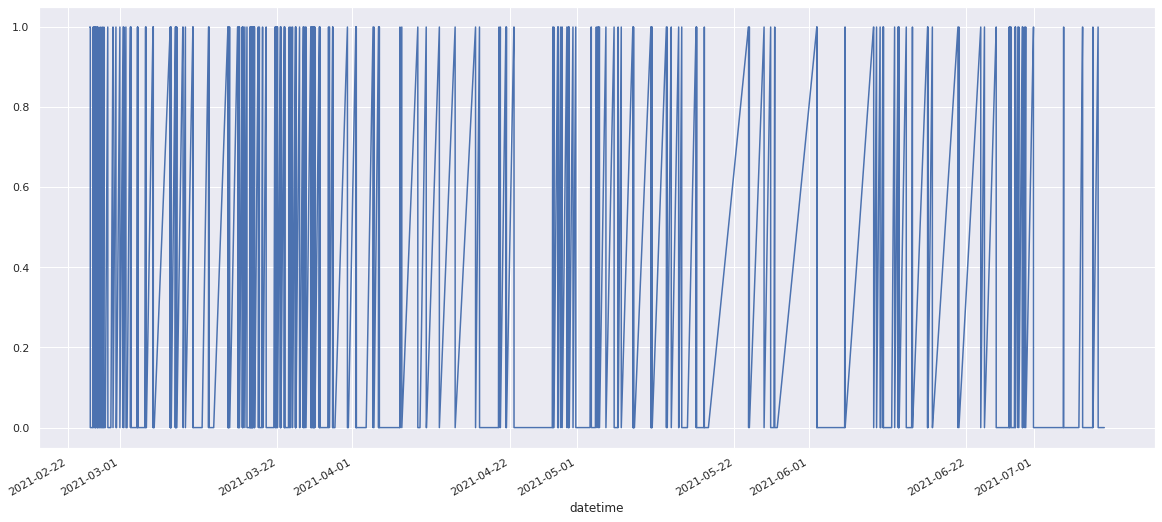

In [146]:
x.plot()